# Competição _Kaggle_ - _House Prices_

Análise de resoluções do desafio de regressão de preço de casas (com *dataset* do [_Kaggle_](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview));

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1nKsflZwXqhKX0FZZmXehTwROWCG-qRoL?usp=sharing)

[Open in Kaggle](https://www.kaggle.com/leonichel/competi-o-kaggle-house-prices)

---

[Leonichel Guimarães (PIBITI/CNPq-FA-UEM)](https://github.com/leonichel)

Professora Linnyer Ruiz (orientadora)

---

Referências bibliográficas:

* [Pedro Marcelino. Kaggle. **Comprehensive data exploration with Python**](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python);

* [Serigne. Kaggle. **Stacked Regressions to predict House Prices**](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/);

* [Deja vu. Kaggle. **House Prices: Plotly, Pipelines and Ensemble**](https://www.kaggle.com/dejavu23/house-prices-plotly-pipelines-and-ensembles/).

---

Manna Team  |  UEM       |     CNPq
:----------:|:----------:|:----------:|
<img src="https://manna.team/_next/static/images/logo2-e283461cfa92b2105bfd67e8e530529e.png" alt="Manna Team" width="200"/> | <img src="https://marcoadp.github.io/WebSiteDIN/img/logo-uem2.svg" alt="UEM" width="200"/> | <img src="https://www.gov.br/cnpq/pt-br/canais_atendimento/identidade-visual/logo_cnpq.svg" alt="CNPq" width="200"/>

## Leitura e exploração do banco de dados

### Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, Lasso, ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# outros modelos
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

from mlxtend.regressor import StackingRegressor

# alertas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Lendo e tratando o banco de dados

In [ ]:
!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5407/868283/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1616804567&Signature=LhG0AdaSxEzAtAqvWj4Ddc1ttVLfElReTXVtox3k0hQTb55SQcjQTS6ocDiN3s0TkAGbzA%2F%2Bf5Dnxa7zBx%2FQvBrGFy%2F13ItAujXf%2BKLb56nYqsDK0Uqne08yXMDUtHo8Rse545QNOkBhglxtLw9Fh%2F8Wuo954cwNJGQnRy5gIp%2Bi9AfTNjfVuSMnvoTCBIkPVemVtvgSV4eGL%2FemALfIY0YJqYm4TOJ%2FcS4fwGd10bFdPzybxFy%2FC9UdZUsgHHMpV9G57fXNvE62BUVa0u3ZZTaId%2BfxAUy5Q%2BswCgRxBDZ%2FwZ%2F323JiB3uKBNdQSZcaRpP2z7MkRgH5btRgLYpHMA%3D%3D&response-content-disposition=attachment%3B+filename%3Dhouse-prices-advanced-regression-techniques.zip" -O 'dataset.zip'
!unzip dataset.zip

--2021-03-25 03:50:16--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5407/868283/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1616804567&Signature=LhG0AdaSxEzAtAqvWj4Ddc1ttVLfElReTXVtox3k0hQTb55SQcjQTS6ocDiN3s0TkAGbzA%2F%2Bf5Dnxa7zBx%2FQvBrGFy%2F13ItAujXf%2BKLb56nYqsDK0Uqne08yXMDUtHo8Rse545QNOkBhglxtLw9Fh%2F8Wuo954cwNJGQnRy5gIp%2Bi9AfTNjfVuSMnvoTCBIkPVemVtvgSV4eGL%2FemALfIY0YJqYm4TOJ%2FcS4fwGd10bFdPzybxFy%2FC9UdZUsgHHMpV9G57fXNvE62BUVa0u3ZZTaId%2BfxAUy5Q%2BswCgRxBDZ%2FwZ%2F323JiB3uKBNdQSZcaRpP2z7MkRgH5btRgLYpHMA%3D%3D&response-content-disposition=attachment%3B+filename%3Dhouse-prices-advanced-regression-techniques.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 2404:6800:4008:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203809 (199K) [application/zip]
Savi

In [ ]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Removendo ID
df_train.drop('Id',axis=1,inplace=True )
id_test = df_test['Id']
df_test.drop('Id',axis=1,inplace=True )

df_train.head()

### Exploração

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [ ]:
df_train.describe(include = ['O']).transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


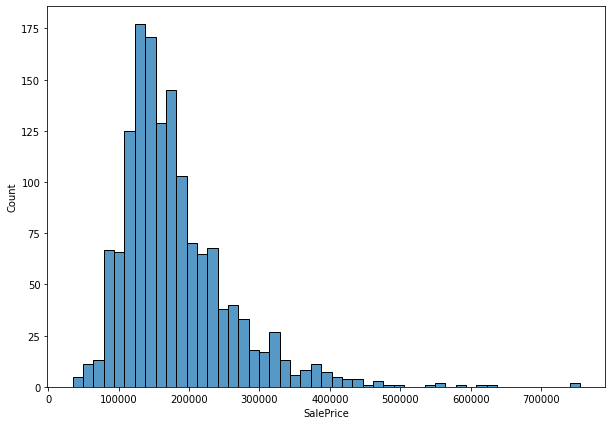

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df_train['SalePrice']);

## Análises e pré-processamentos

### Valores nulos (_missing data_)

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [ ]:
df_train.drop(['PoolQC', 'FireplaceQu', 'Fence', 
               'Alley', 'MiscFeature'], axis=1, inplace=True)
df_test.drop(['PoolQC', 'FireplaceQu', 'Fence',
               'Alley', 'MiscFeature'], axis=1, inplace=True)

### Corelações

In [ ]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
SalePrice_Log    0.948374
all_SF           0.824106
OverallQual      0.790982
all_Liv_SF       0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

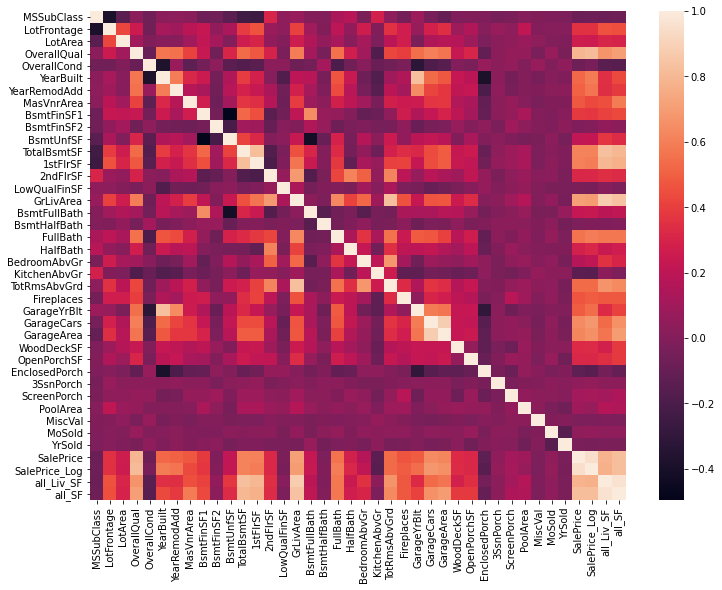

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_train.corr());

In [ ]:
topCols = df_train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
topCols

Index(['SalePrice', 'SalePrice_Log', 'all_SF', 'OverallQual', 'all_Liv_SF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'],
      dtype='object')

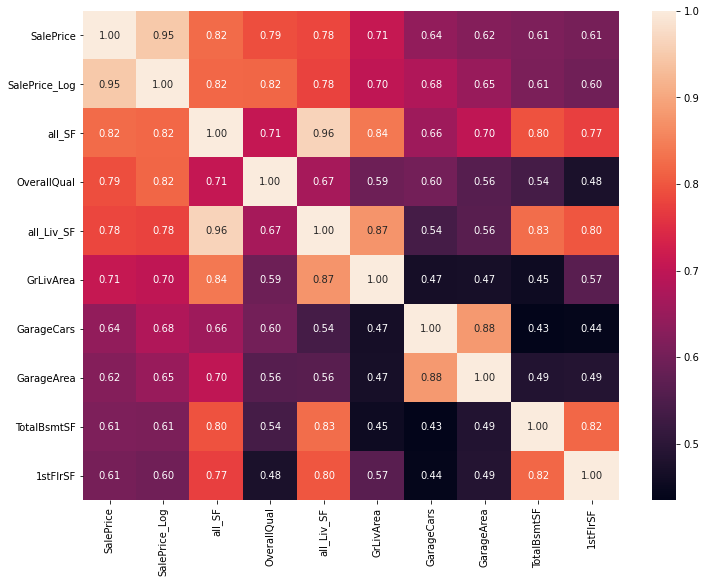

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_train[topCols].corr(), annot=True, fmt='.2f');

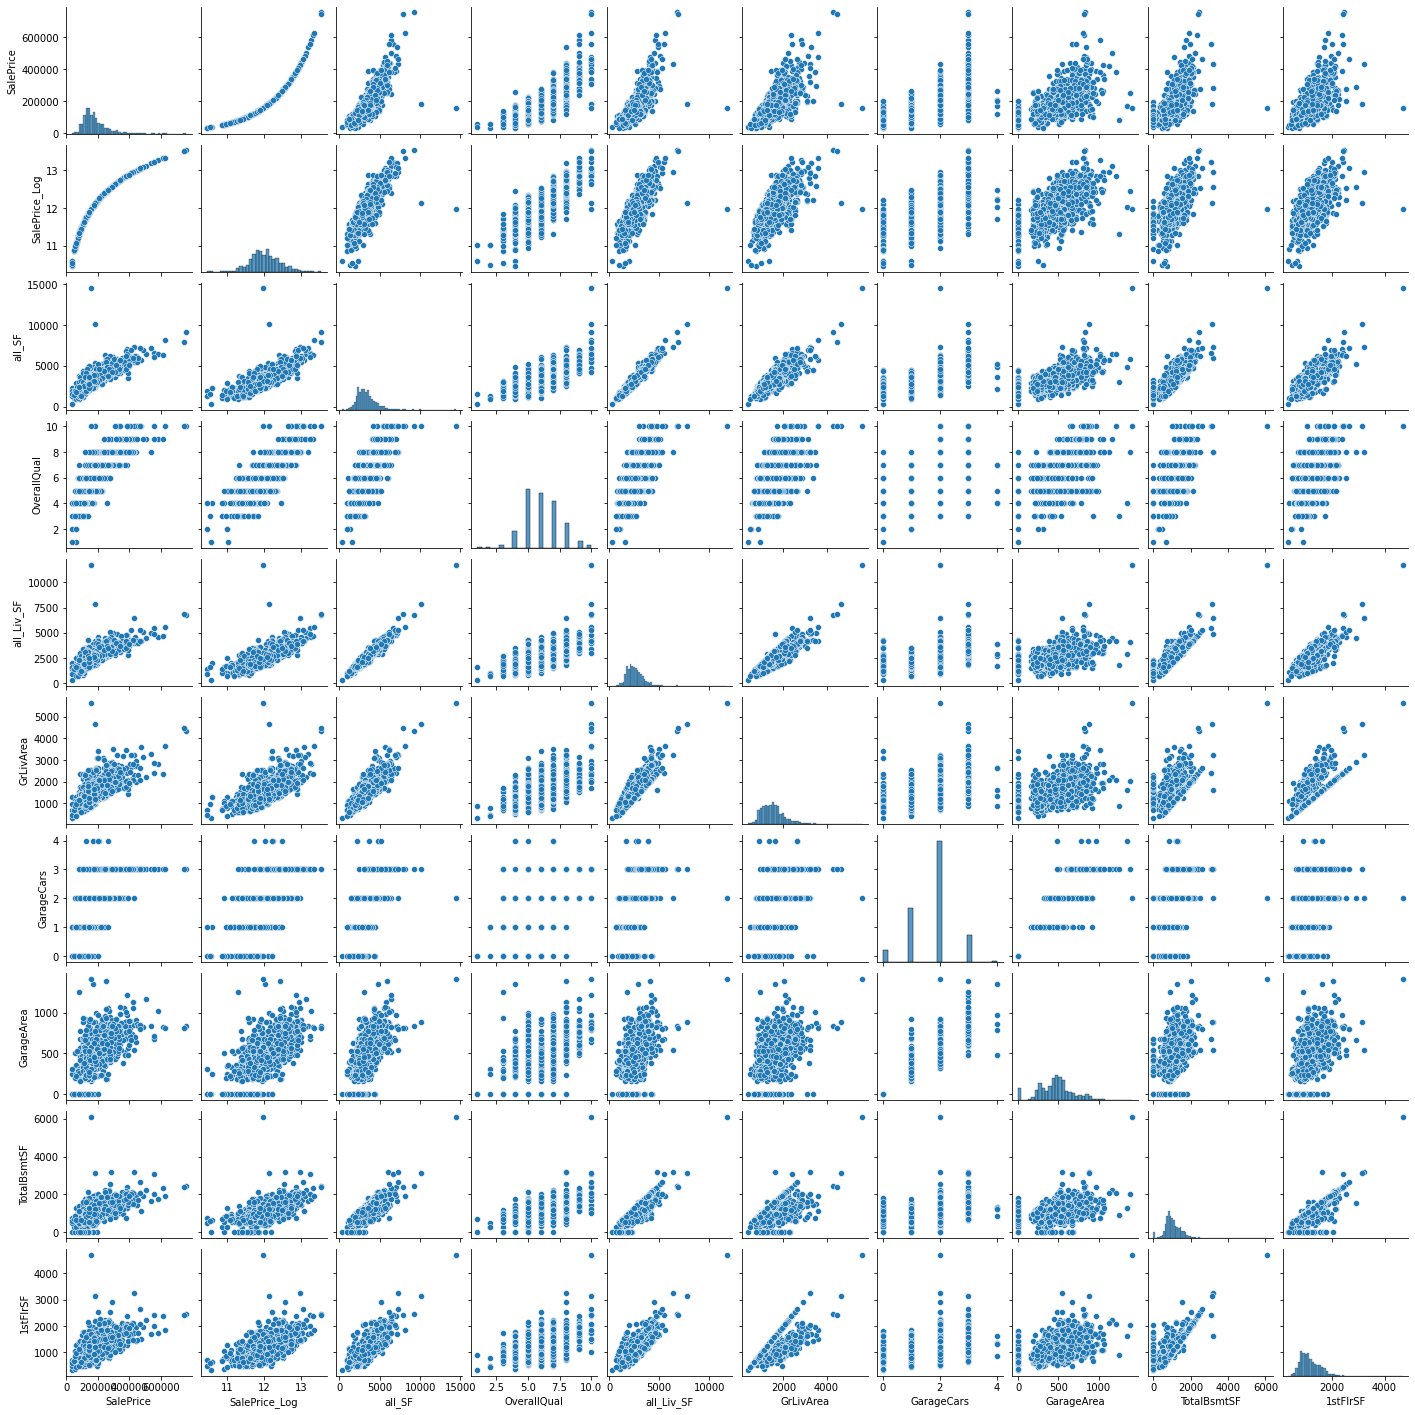

In [ ]:
sns.pairplot(df_train[topCols], height=2);

### Atributos numéricos

In [ ]:
numerical_columns = df_train.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log', 'all_Liv_SF', 'all_SF']


#### Logarítimo

In [ ]:
df_train["SalePrice_Log"] = np.log1p(df_train["SalePrice"])

#### Atributo _GrLivArea_

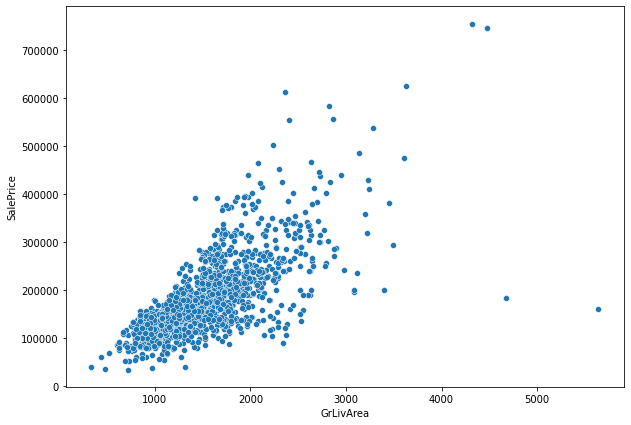

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice');

In [ ]:
outliers_GrLivArea = df_train.loc[(df_train['GrLivArea']>4000.0) & (df_train['SalePrice']<300000.0)]
outliers_GrLivArea[['GrLivArea' , 'SalePrice']] # necessário remover

,GrLivArea,SalePrice
523,4676,184750
1298,5642,160000


#### Atributos combinados

In [ ]:
# Para áreas internas
df_train['all_Liv_SF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF'] 
df_test['all_Liv_SF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF'] 

print(df_train['all_Liv_SF'].corr(df_train['SalePrice']))
print(df_train['all_Liv_SF'].corr(df_train['SalePrice_Log']))

0.7822600527979846
0.7772965628581215


In [ ]:
# Para áreas externas
df_train['all_SF'] = ( df_train['all_Liv_SF'] + df_train['GarageArea'] + df_train['MasVnrArea'] 
                       + df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['ScreenPorch'] )
df_test['all_SF'] = ( df_test['all_Liv_SF'] + df_test['GarageArea'] + df_test['MasVnrArea']
                      + df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_train['ScreenPorch'] )

print(df_train['all_SF'].corr(df_train['SalePrice']))
print(df_train['all_SF'].corr(df_train['SalePrice_Log']))

0.8241059734384169
0.8198114866767111


In [ ]:
df_train['all_SF'].corr(df_train['all_Liv_SF']) # pode dar problema essa bicorrelação, mas será ignorada

0.9632776366224406

In [ ]:
# Outliers para allSF
outliers_allSF = df_train.loc[(df_train['all_SF']>8000.0) & (df_train['SalePrice']<200000.0)]
outliers_allSF[['all_SF' , 'SalePrice']]

,all_SF,SalePrice


In [ ]:
df_train = df_train.drop(outliers_allSF.index)

In [ ]:
df_train.corr().abs()[['SalePrice','SalePrice_Log']].sort_values(by='SalePrice', ascending=False)[2:16]

,SalePrice,SalePrice_Log
all_SF,0.866747,0.860175
all_Liv_SF,0.832877,0.825326
OverallQual,0.795774,0.821405
GrLivArea,0.734968,0.725211
TotalBsmtSF,0.651153,0.647563
GarageCars,0.641047,0.681033
1stFlrSF,0.631530,0.620500
GarageArea,0.629217,0.656129
FullBath,0.562165,0.595899
TotRmsAbvGrd,0.537769,0.537702


#### Atributo _OverallQual_

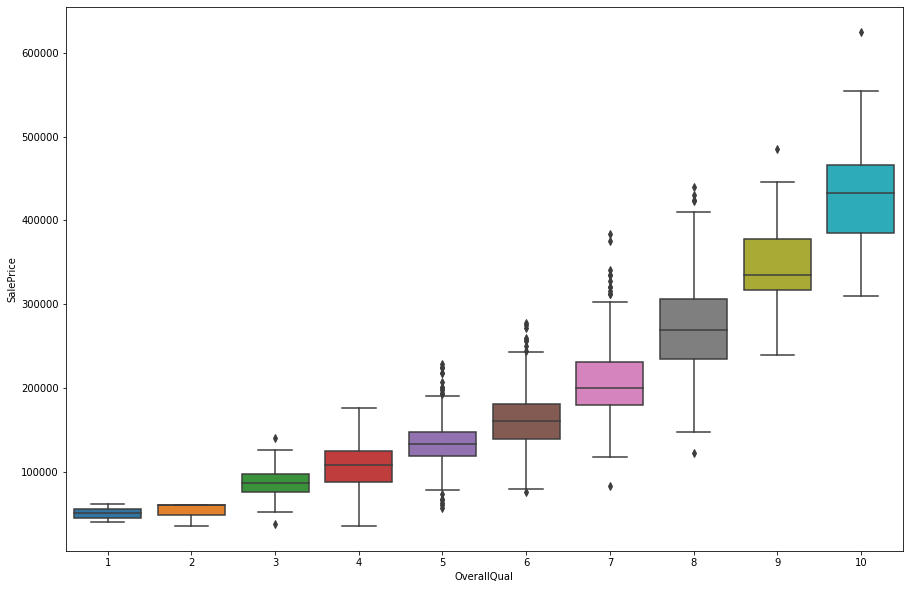

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_train, x='OverallQual', y='SalePrice');

In [ ]:
outliers_OverallQual_4 = df_train.loc[(df_train['OverallQual']==4) & (df_train['SalePrice']>200000.0)]
outliers_OverallQual_8 = df_train.loc[(df_train['OverallQual']==8) & (df_train['SalePrice']>500000.0)]
outliers_OverallQual_9 = df_train.loc[(df_train['OverallQual']==9) & (df_train['SalePrice']>500000.0)]
outliers_OverallQual_10 = df_train.loc[(df_train['OverallQual']==10) & (df_train['SalePrice']>700000.0)]

outliers_OverallQual = pd.concat([outliers_OverallQual_4, outliers_OverallQual_8, 
                                  outliers_OverallQual_9, outliers_OverallQual_10])

In [ ]:
outliers_OverallQual[['OverallQual' , 'SalePrice']]

,OverallQual,SalePrice
457,4,256000
769,8,538000
178,9,501837
803,9,582933
898,9,611657
1046,9,556581
691,10,755000
1182,10,745000


In [ ]:
df_train = df_train.drop(outliers_OverallQual.index)

In [ ]:
df_train.corr().abs()[['SalePrice','SalePrice_Log']].sort_values(by='SalePrice', ascending=False)[2:16]

,SalePrice,SalePrice_Log
all_SF,0.862866,0.853053
all_Liv_SF,0.823502,0.816709
OverallQual,0.809400,0.819386
GrLivArea,0.718054,0.712796
GarageCars,0.652310,0.677201
TotalBsmtSF,0.641396,0.633767
GarageArea,0.634881,0.649590
1stFlrSF,0.618476,0.604977
FullBath,0.555959,0.586060
YearBuilt,0.540550,0.588290


## Pré-processamento e _pipelines_

In [ ]:
# Criando variáveis para transformar
y , y_log = df_train["SalePrice"] , df_train["SalePrice_Log"]
df_train.drop(["SalePrice", "SalePrice_Log"] , axis=1, inplace=True)

In [ ]:
X_1 = df_train
y_1 = y_log

In [ ]:
X_2 = df_train
y_2 = y

In [ ]:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
X_1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,all_Liv_SF,all_SF
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,2566,3371.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,2524,3282.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,2706,3518.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,2473,3150.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,3343,4805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,2600,3100.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,3615,4583.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,3492,3804.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,2156,2762.0


In [ ]:
# Numérico
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
# Categórico
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Juntando
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,   numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Pipeline com modelos de aprendizagem lineares

# LinearRegression
pipe_Linear = Pipeline(
    steps   = [('preprocessor', preprocessor),
               ('Linear', LinearRegression()) ])    
# Ridge
pipe_Ridge = Pipeline(
    steps  = [('preprocessor', preprocessor),
              ('Ridge', Ridge(random_state=5)) ])  
# Lasso
pipe_Lasso = Pipeline(
    steps  = [ ('preprocessor', preprocessor),
               ('Lasso', Lasso(random_state=5)) ])
# ElasticNet
pipe_ElaNet = Pipeline(
    steps   = [ ('preprocessor', preprocessor),
                ('ElaNet', ElasticNet(random_state=5)) ])

# BayesianRidge
pipe_BayesRidge = Pipeline(
    steps   = [ ('preprocessor', preprocessor),
                ('BayesRidge', BayesianRidge(n_iter=500, compute_score=True)) ])


In [ ]:
# Pipeline com modelos de aprendizagem ensemble

# GradientBoostingRegressor
pipe_GBR  = Pipeline(
    steps = [ ('preprocessor', preprocessor),
              ('GBR', GradientBoostingRegressor(random_state=5 )) ])

# XGBRegressor
pipe_XGB  = Pipeline(
    steps = [ ('preprocessor', preprocessor),
              ('XGB', XGBRegressor(objective='reg:squarederror', metric='rmse', 
                      random_state=5, nthread = -1)) ])
# LGBM
pipe_LGBM = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('LGBM', LGBMRegressor(objective='regression', metric='rmse',
                                  random_state=5)) ])
# AdaBoostRegressor
pipe_ADA = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('ADA', AdaBoostRegressor(DecisionTreeRegressor(), 
                random_state=5, loss='exponential')) ])

## Validação cruzada (_cross-validation_)

### Modelos lineares

In [ ]:
list_pipelines = [pipe_Linear, pipe_Ridge, pipe_Lasso, pipe_ElaNet]

In [ ]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for pipe in list_pipelines :
    
    scores = cross_val_score(pipe, X_1, y_1, scoring='neg_mean_squared_error', cv=5)
    scores = np.sqrt(-scores)
    print(pipe.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 0.125442 	 0.010449 	 0.109575
Ridge 	 0.117562 	 0.008658 	 0.105224
Lasso 	 0.389983 	 0.018456 	 0.369337
ElaNet 	 0.389983 	 0.018456 	 0.369337


* Modelos lineares e _Rigde_ estão bons com hiper-parâmetros padrões;

* Demais precisam de otimização.

### Modelos _ensemble_

In [ ]:
list_pipelines = [pipe_GBR, pipe_XGB, pipe_LGBM, pipe_ADA]

In [ ]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)

for pipe in list_pipelines :
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=FutureWarning)
        scores = cross_val_score(pipe, X_1, y_1, scoring='neg_mean_squared_error', cv=5)
        scores = np.sqrt(-scores)
        print(pipe.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
GBR 	 0.121357 	 0.007096 	 0.111194
XGB 	 0.121115 	 0.006308 	 0.112096
LGBM 	 0.124973 	 0.005158 	 0.117518
ADA 	 0.135391 	 0.005797 	 0.126512


* Com exeção do AdaBoost, os hiper-parâmetros padrões funcionaram bem.

## Otimização de hiper-parâmetros

In [ ]:
# Para teste com outras formas de padronização de dados
list_scalers = [StandardScaler(), 
                RobustScaler(), 
                QuantileTransformer(output_distribution='normal')]

# Usaremos apenas o mais comum
list_scalers = [StandardScaler()]

### Modelos lineares

#### Linear Regression

**fit_intercept** : boolean, optional, default True  
**normalize** : boolean, optional, default False  
**copy_X** : boolean, optional, default True  
**n_jobs** : int or None, optional (default=None)  
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [ ]:
parameters_Linear = { 'preprocessor__num__scaler': list_scalers,
                     'Linear__fit_intercept':  [True,False],
                     'Linear__normalize':  [True,False] }

gscv_Linear = GridSearchCV(pipe_Linear, parameters_Linear, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=0, cv=5)
gscv_Linear.fit(X_1, y_1)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_Linear.best_score_))  
gscv_Linear.best_params_

0.12585470424696357


{'Linear__fit_intercept': True,
 'Linear__normalize': True,
 'preprocessor__num__scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### Ridge

**alpha** :
Regularization strength, must be a positive float  
**fit_intercept** : bool, default True  
**normalize** : boolean, optional, default False  
**copy_X** : boolean, optional, default True  
**max_iter** : int  
**tol** : float  
Precision of the solution  
**solver** : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}  
Solver to use in the computational routines

In [ ]:
parameters_Ridge = { 'preprocessor__num__scaler': list_scalers,
                     'Ridge__alpha': [7,8,9],
                     'Ridge__fit_intercept':  [True,False],
                     'Ridge__normalize':  [True,False] }

gscv_Ridge = GridSearchCV(pipe_Ridge, parameters_Ridge, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=0, cv=5)
gscv_Ridge.fit(X_1, y_1)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_Ridge.best_score_))  
gscv_Ridge.best_params_

0.114025472297053


{'Ridge__alpha': 9,
 'Ridge__fit_intercept': True,
 'Ridge__normalize': False,
 'preprocessor__num__scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### Lasso

In [ ]:
parameters_Lasso = { 'preprocessor__num__scaler': list_scalers,
                     'Lasso__alpha': [0.0005, 0.001],
                     'Lasso__fit_intercept':  [True],
                     'Lasso__normalize':  [True,False] }

gscv_Lasso = GridSearchCV(pipe_Lasso, parameters_Lasso, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_Lasso.fit(X_1, y_1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_Lasso.best_score_))  
gscv_Lasso.best_params_

0.11139865069267002


{'Lasso__alpha': 0.0005,
 'Lasso__fit_intercept': True,
 'Lasso__normalize': False,
 'preprocessor__num__scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

#### ElasticNet

In [ ]:
parameters_ElaNet = { 'ElaNet__alpha': [0.0005, 0.001],
                      'ElaNet__l1_ratio':  [0.85, 0.9],
                      'ElaNet__normalize':  [True,False] }

gscv_ElaNet = GridSearchCV(pipe_ElaNet, parameters_ElaNet, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_ElaNet.fit(X_1, y_1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_ElaNet.best_score_))  
gscv_ElaNet.best_params_

0.11149634387451143


{'ElaNet__alpha': 0.0005, 'ElaNet__l1_ratio': 0.9, 'ElaNet__normalize': False}

#### Validação cruzada dos modelos lineares aperfeiçoados

In [ ]:
list_pipelines_gscv = [gscv_Linear,gscv_Ridge,gscv_Lasso,gscv_ElaNet]

In [ ]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for gscv in list_pipelines_gscv :
    
    scores = cross_val_score(gscv.best_estimator_, X_1, y_1, 
                             scoring='neg_mean_squared_error', cv=5)
    scores = np.sqrt(-scores)
    print(gscv.estimator.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 0.125414 	 0.010527 	 0.109707
Ridge 	 0.113834 	 0.006607 	 0.103450
Lasso 	 0.111191 	 0.006800 	 0.101235
ElaNet 	 0.111279 	 0.006965 	 0.101112


### Modelos _ensemble_

#### GradientBoostingRegressor

**loss** : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)  
**learning_rate** : float, optional (default=0.1)  
**n_estimators** : int (default=100)  
**subsample** : float, optional (default=1.0)  
**criterion** : string, optional (default=”friedman_mse”)  
**min_samples_split** : int, float, optional (default=2)  
If int: minimum number. If float: fraction  
**min_samples_leaf** : int, float, optional (default=1)   
If int minimum number. If float fraction   
**min_weight_fraction_leaf** : float, optional (default=0.)  
**max_depth** : integer, optional (default=3)
maximum depth of the individual regression estimators.  
**min_impurity_decrease** : float, optional (default=0.)

**max_features** : int, float, string or None, optional (default=None)  
The number of features to consider when looking for the best split:  
If float: fraction  
If “auto”, then max_features=n_features.  
If “sqrt”, then max_features=sqrt(n_features).  
If “log2”, then max_features=log2(n_features).  
If None, then max_features=n_features.  
Choosing max_features < n_features leads to a reduction of variance and an increase in bias.  


In [ ]:
parameters_GBR = { 'GBR__n_estimators':  [400], 
                   'GBR__max_depth':  [3,4],
                   'GBR__min_samples_leaf':  [5,6],                 
                   'GBR__max_features':  ["auto",0.5,0.7],                  
                 }
                   
gscv_GBR = GridSearchCV(pipe_GBR, parameters_GBR, n_jobs=-1, 
                        scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_GBR.fit(X_1, y_1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_GBR.best_score_))  
gscv_GBR.best_params_

0.11562122611987459


{'GBR__max_depth': 3,
 'GBR__max_features': 0.5,
 'GBR__min_samples_leaf': 6,
 'GBR__n_estimators': 400}

#### XGB

General Parameters  
**booster**: gbtree, gblinear or dart, default= gbtree   

Parameters for Tree Booster  
**eta**, alias: learning_rate, 0<eta<1 , default=0.3  
**gamma**, alias: min_split_loss,  default=0,  
Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.  
**max_depth**, default=6  
**min_child_weight**, default=1
The larger min_child_weight is, the more conservative the algorithm will be.  
**max_delta_step** [default=0]  
**subsample** [default=1],  range: (0,1]  
Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. Subsampling will occur once in every boosting iteration.  
**colsample_bytree, colsample_bylevel, colsample_bynode** [default=1]  
This is a family of parameters for subsampling of columns.  
All colsample_by* parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.  
colsample_by* parameters work cumulatively. For instance, the combination {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} with 64 features will leave 8 features to choose from at each split.  
**lambda** [default=1, alias: reg_lambda]  
L2 regularization term on weights. Increasing this value will make model more conservative.  
**alpha** [default=0, alias: reg_alpha]  
L1 regularization term on weights. Increasing this value will make model more conservative.  
**tree_method** string [default= auto]  
Choices: auto, exact, approx, hist, gpu_hist  

In [ ]:
parameters_XGB = { 'XGB__learning_rate': [0.021,0.022],
                   'XGB__max_depth':  [2,3],
                   'XGB__n_estimators':  [2000], 
                   'XGB__reg_lambda':  [1.5, 1.6], 
                   'XGB__reg_alpha':  [1,1.5],                   
# colsample_bytree , subsample               
                  }
                   
gscv_XGB = GridSearchCV(pipe_XGB, parameters_XGB, n_jobs=-1, 
                        scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_XGB.fit(X_1, y_1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_XGB.best_score_))  
gscv_XGB.best_params_

0.11707528739655751


{'XGB__learning_rate': 0.022,
 'XGB__max_depth': 2,
 'XGB__n_estimators': 2000,
 'XGB__reg_alpha': 1,
 'XGB__reg_lambda': 1.5}

#### LGBM

**num_iterations**, default=100, alias=num_iteration,num_tree,num_trees,num_round,num_rounds  
**learning_rate**, default=0.1, alias=shrinkage_rate  
**num_leaves**, default=31


**max_depth**, default=-1, < 0 means no limit  
**min_data_in_leaf**, default=20, type=int, alias=min_data_per_leaf , min_data  
**min_sum_hessian_in_leaf**, default=1e-3, alias=min_sum_hessian_per_leaf, min_sum_hessian, min_hessian  
**feature_fraction**, default=1.0, 0.0 < feature_fraction < 1.0, alias=sub_feature  
**bagging_fraction**, default=1.0, 0.0 < bagging_fraction < 1.0, alias=sub_row  
**bagging_freq**, default=0,   
Frequency for bagging, 0 means disable bagging. k means will perform bagging at every k iteration   
**early_stopping_round** , default=0, type=int, alias=early_stopping_rounds,early_stopping  
Will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds  
**lambda_l1** , default=0  
**lambda_l2** , default=0

In [ ]:
parameters_LGBM = { 'LGBM__learning_rate': [0.01,0.02],
                    'LGBM__n_estimators':  [1000], 
                    'LGBM__num_leaves':  [8,10],
                    'LGBM__bagging_fraction':  [0.7,0.8],
                    'LGBM__bagging_freq':  [1,2],                  
                   }

gscv_LGBM = GridSearchCV(pipe_LGBM, parameters_LGBM, n_jobs=-1, 
                       scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_LGBM.fit(X_1, y_1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_LGBM.best_score_))  
gscv_LGBM.best_params_

0.11721993687582227


{'LGBM__bagging_fraction': 0.7,
 'LGBM__bagging_freq': 1,
 'LGBM__learning_rate': 0.01,
 'LGBM__n_estimators': 1000,
 'LGBM__num_leaves': 8}

#### AdaBoostRegressor

In [ ]:
parameters_ADA = { 'ADA__learning_rate': [3.5],
                   'ADA__n_estimators':  [500], 
                   'ADA__base_estimator__max_depth':  [8,9,10],                  
                 }

pipe_ADA = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('ADA', AdaBoostRegressor(
                DecisionTreeRegressor(min_samples_leaf=5,
                                      min_samples_split=5), 
                random_state=5,loss='exponential')) ])

gscv_ADA = GridSearchCV(pipe_ADA, parameters_ADA, n_jobs=-1, 
                       scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_ADA.fit(X_1, y_1)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [ ]:
print(np.sqrt(-gscv_ADA.best_score_))  
gscv_ADA.best_params_

0.1287996836847746


{'ADA__base_estimator__max_depth': 10,
 'ADA__learning_rate': 3.5,
 'ADA__n_estimators': 500}

#### Validação cruzada dos modelos _ensemble_ aperfeiçoados

In [ ]:
list_pipelines_gscv = [gscv_GBR, gscv_XGB,gscv_LGBM,gscv_ADA]

In [ ]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for gscv in list_pipelines_gscv :
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=FutureWarning)    
        scores = cross_val_score(gscv.best_estimator_, X_1, y_1, 
                             scoring='neg_mean_squared_error', cv=5)
        scores = np.sqrt(-scores)
        print(gscv.estimator.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
GBR 	 0.115412 	 0.006953 	 0.106615
XGB 	 0.116939 	 0.005638 	 0.108550
LGBM 	 0.117372 	 0.004289 	 0.111896
ADA 	 0.128743 	 0.003820 	 0.121699


## _Stacking_ 

In [ ]:
lnr = LinearRegression(n_jobs = -1)

rdg = Ridge(alpha=3.0, copy_X=True, fit_intercept=True, random_state=1)

rft = RandomForestRegressor(n_estimators = 12, max_depth = 3, n_jobs = -1, random_state=1)

gbr = GradientBoostingRegressor(n_estimators = 40, max_depth = 2, random_state=1)

mlp = MLPRegressor(hidden_layer_sizes = (90, 90), alpha = 2.75, random_state=1)

stack1

In [ ]:
stack1 = StackingRegressor(regressors = [rdg, rft, gbr], 
                           meta_regressor = lnr)

In [ ]:
pipe_STACK_1 = Pipeline(steps=[ ('preprocessor', preprocessor),
                                ('stack1', stack1) ])

pipe_STACK_1.fit(X_1, y_1)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [ ]:
scores = cross_val_score(pipe_STACK_1, X_1, y_1, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-scores)
print(pipe_STACK_1.steps[1][0], "\t", 
        '{:08.6f}'.format(np.mean(scores)), "\t",  
        '{:08.6f}'.format(np.std(scores)),  "\t", 
        '{:08.6f}'.format(np.min(scores)))

stack1 	 0.113830 	 0.007214 	 0.102715


## Predições com banco de dados de teste

In [ ]:
model = gscv_Lasso.best_estimator_

In [ ]:
prediction = model.predict(df_test)

In [ ]:
subm = pd.DataFrame()
subm['Id'] = id_test
subm['SalePrice'] = np.expm1(prediction) # Exponencial - 1, por causa do log
subm.to_csv('Lasso.csv', index=False)